<a href="https://www.kaggle.com/code/roucks/majorscinceproject-py?scriptVersionId=113328707" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/test-file/tested.csv


In [2]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#The Data
#reading in the titanic_train.csv file into a pandas dataframe.


df = pd.read_csv('/kaggle/input/test-file/tested.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
#checking for null value
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,False,True,False,False,False,False,True,False


<AxesSubplot:>

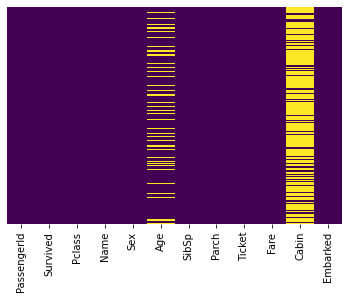

In [4]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

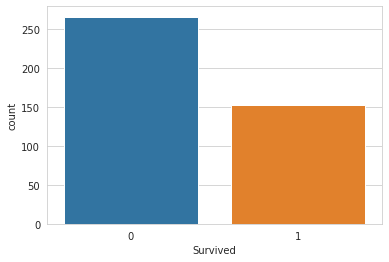

In [5]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

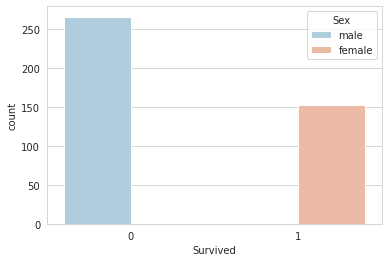

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=df,palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

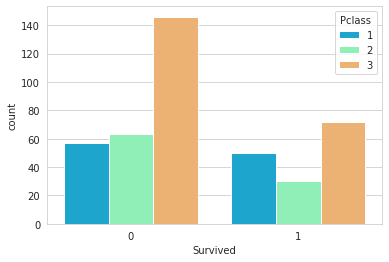

In [7]:

sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df,palette='rainbow')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

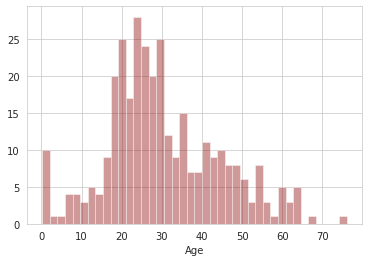

In [8]:

sns.distplot(df['Age'].dropna(),kde=False,color='darkred',bins=40)

<AxesSubplot:>

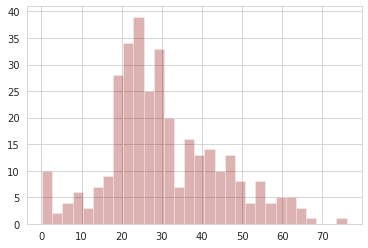

In [9]:
df['Age'].hist(bins=30,color='darkred',alpha=0.3)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

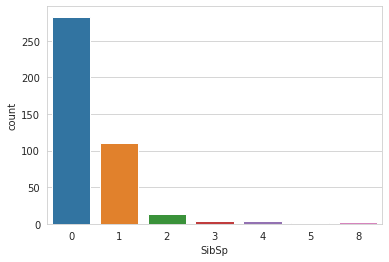

In [10]:

sns.countplot(x='SibSp',data=df)

<AxesSubplot:>

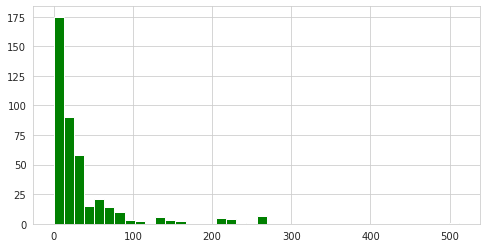

In [11]:
df['Fare'].hist(color='green',bins=40,figsize=(8,4))

In [12]:
#Cufflinks for plots
#Let's take a quick moment to show an example of cufflinks!

import cufflinks as cf
cf.go_offline()

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning:

The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.



In [13]:
df['Fare'].iplot(kind='hist',bins=30,color='green')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

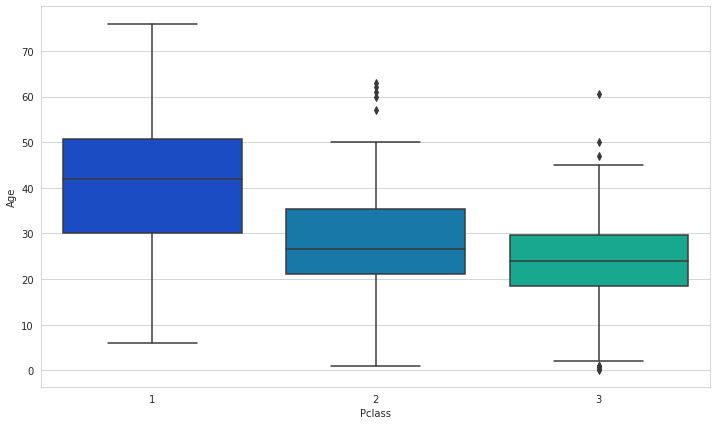

In [14]:
     
#Data Cleaning

plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

In [15]:
#We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [16]:
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

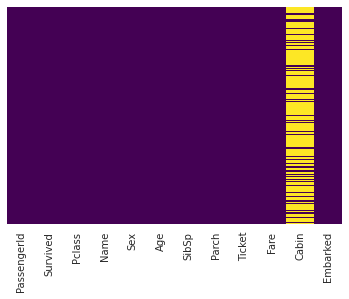

In [17]:
#Now let's check that heat map again!


sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

In [18]:
df.drop('Cabin',axis=1,inplace=True)

In [19]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [20]:
df.dropna(inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  417 non-null    int64  
 1   Survived     417 non-null    int64  
 2   Pclass       417 non-null    int64  
 3   Name         417 non-null    object 
 4   Sex          417 non-null    object 
 5   Age          417 non-null    float64
 6   SibSp        417 non-null    int64  
 7   Parch        417 non-null    int64  
 8   Ticket       417 non-null    object 
 9   Fare         417 non-null    float64
 10  Embarked     417 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 39.1+ KB


In [22]:
pd.get_dummies(df['Embarked'],drop_first=True).head()

,Q,S
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1


In [23]:
sex = pd.get_dummies(df['Sex'],drop_first=True)
embark = pd.get_dummies(df['Embarked'],drop_first=True)

In [24]:

df.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [25]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,892,0,3,34.5,0,0,7.8292
1,893,1,3,47.0,1,0,7.0000
2,894,0,2,62.0,0,0,9.6875
3,895,0,3,27.0,0,0,8.6625
4,896,1,3,22.0,1,1,12.2875


In [26]:
df = pd.concat([df,sex,embark],axis=1)

In [27]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,0,3,34.5,0,0,7.8292,1,1,0
1,893,1,3,47.0,1,0,7.0000,0,0,1
2,894,0,2,62.0,0,0,9.6875,1,1,0
3,895,0,3,27.0,0,0,8.6625,1,0,1
4,896,1,3,22.0,1,1,12.2875,0,0,1


Train Test Split

In [28]:
df.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


In [29]:
df['Survived'].head()

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived',axis=1), 
                                                    df['Survived'], test_size=0.30, 
                                                    random_state=101)

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [34]:
predictions = logmodel.predict(X_test)

In [35]:
from sklearn.metrics import confusion_matrix


In [36]:
accuracy=confusion_matrix(y_test,predictions)
accuracy

array([[65,  0],
       [ 0, 61]])

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
accuracy=accuracy_score(y_test,predictions)
accuracy


1.0

In [39]:
predictions

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1])

In [40]:
from sklearn.metrics import classification_report

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        65
           1       1.00      1.00      1.00        61

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126

